<a href="https://colab.research.google.com/github/HuynhTriHenry/BT_AI/blob/main/DieukiendongcoDC_NhietDo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=827e786a5c8c7bd1f2aaae300d8e8d5da9149558c7baf162861fcdbc4c34ad89
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


87.41135193418533


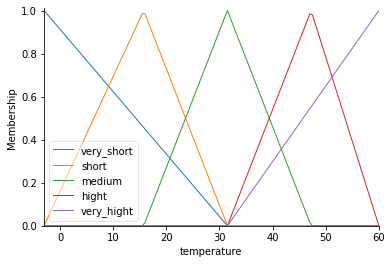

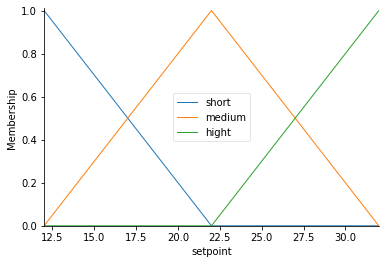

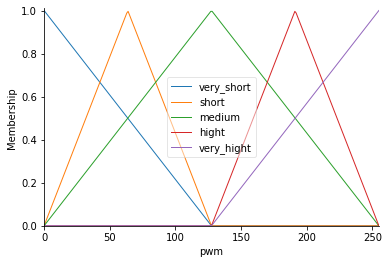

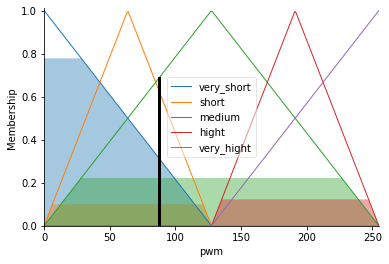

In [9]:
import numpy as np
import skfuzzy as fuzz 
from skfuzzy import control as ctrl 

temperature = ctrl.Antecedent(np.arange(-3,60.5,0.5),'temperature')
setpoint = ctrl.Antecedent(np.arange(12,32.5,0.5),'setpoint')
pwm = ctrl.Consequent(np.arange(0,256,1),'pwm')


#The temperature 
temperature['very_short']= fuzz.trimf(temperature.universe,[-3,-3,31.5])
temperature['short']= fuzz.trimf(temperature.universe,[-3,15.75,31.5])
temperature['medium']= fuzz.trimf(temperature.universe,[15.75,31.5,47.25])
temperature['hight']= fuzz.trimf(temperature.universe,[31.5,47.25,60])
temperature['very_hight']= fuzz.trimf(temperature.universe,[31.5,60,60])

# the setpoint
setpoint['short']= fuzz.trimf(setpoint.universe,[12,12,22])
setpoint['medium']= fuzz.trimf(setpoint.universe,[12,22,32])
setpoint['hight']= fuzz.trimf(setpoint.universe,[22,32,32])

pwm['very_short']= fuzz.trimf(pwm.universe,[0,0,255/2])
pwm['short']= fuzz.trimf(pwm.universe,[0,255/4,255/2])
pwm['medium']= fuzz.trimf(pwm.universe,[0,255/2,255])
pwm['hight']= fuzz.trimf(pwm.universe,[255/2,255*3/4,255])
pwm['very_hight']= fuzz.trimf(pwm.universe,[255/2,255,255])


temperature.view()
setpoint.view()
pwm.view()


rule1 = ctrl.Rule(temperature['very_short'] & setpoint['short'],pwm['short'])
rule2 = ctrl.Rule(temperature['short'] & setpoint['short'],pwm['very_short'])
rule3 = ctrl.Rule(temperature['medium'] & setpoint['short'],pwm['medium'])
rule4 = ctrl.Rule(temperature['hight'] & setpoint['short'],pwm['hight'])
rule5 = ctrl.Rule(temperature['very_hight'] & setpoint['short'],pwm['very_hight'])

rule6 = ctrl.Rule(temperature['very_short'] & setpoint['medium'],pwm['hight'])
rule7 = ctrl.Rule(temperature['short'] & setpoint['medium'],pwm['medium'])
rule8 = ctrl.Rule(temperature['medium'] & setpoint['medium'],pwm['very_short'])
rule9 = ctrl.Rule(temperature['hight'] & setpoint['medium'],pwm['medium'])
rule10 = ctrl.Rule(temperature['very_hight'] & setpoint['medium'],pwm['hight'])

rule11 = ctrl.Rule(temperature['very_short'] & setpoint['hight'],pwm['very_short'])
rule12 = ctrl.Rule(temperature['short'] & setpoint['hight'],pwm['very_short'])
rule13 = ctrl.Rule(temperature['medium'] & setpoint['hight'],pwm['short'])
rule14 = ctrl.Rule(temperature['hight'] & setpoint['hight'],pwm['medium'])
rule15 = ctrl.Rule(temperature['very_hight'] & setpoint['hight'],pwm['very_short'])

pwming_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
pwming= ctrl.ControlSystemSimulation(pwming_ctrl)
pwming.input['setpoint']=23
pwming.input['temperature']=35
pwming.compute()
print(pwming.output['pwm'])
pwm.view(sim=pwming)